# Brevdo method

In [1]:
import matlab.engine
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.benchmark_utils import MatlabInterface
from methods.method_brevdo import NewMethod
import sys
import os

In [2]:
# A test for new methods
# np.random.seed(0) 

# signal parameters
SNRin = 20
N = 2**10
# Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_multi_linear_2()
# s = sbank.signal_mc_cos_plus_tone()
# s = sbank.signal_mc_on_off_tones()
# s = sbank.signal_mc_triple_impulse()
# s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_crossing_chirps()
# s = sbank.signal_mc_synthetic_mixture_2()
s = sbank.signal_mc_synthetic_mixture_5()

signal, noise = add_snr(s,SNRin)
print(signal.total_comps)
# signal = s + noise*np.sqrt(N/Nsub) 

snr_out:20.0
3


22.67474087474423


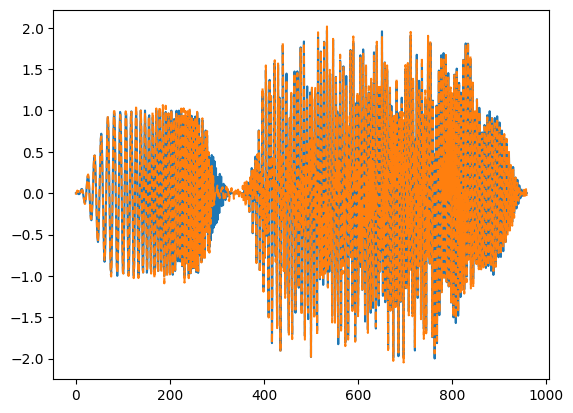

In [3]:

Nfft = 2*N
g,_ = get_round_window(Nfft)
S, F= get_spectrogram(s, window = g)
F = F[0:N+1]

methodml = NewMethod()
funa = methodml.method
# xr = brevdo_method(x, Ncomp, use_sst, Pnei, M, L)
Pnei = 70
M = 2*N
L = (M/4)**0.5

# signal_output = funa(signal,[],True,Pnei,M,L)
signal_output = funa(signal,)
S_output, F_output = get_spectrogram(signal_output, window = g)
F_output = F_output[0:N+1]

print(10*np.log10((np.sum(s[tmin:tmax]**2))/(np.sum((s[tmin:tmax]-signal_output[tmin:tmax])**2))))

plt.figure()
plt.plot(s[tmin:tmax])
plt.plot(signal_output[tmin:tmax],'--')

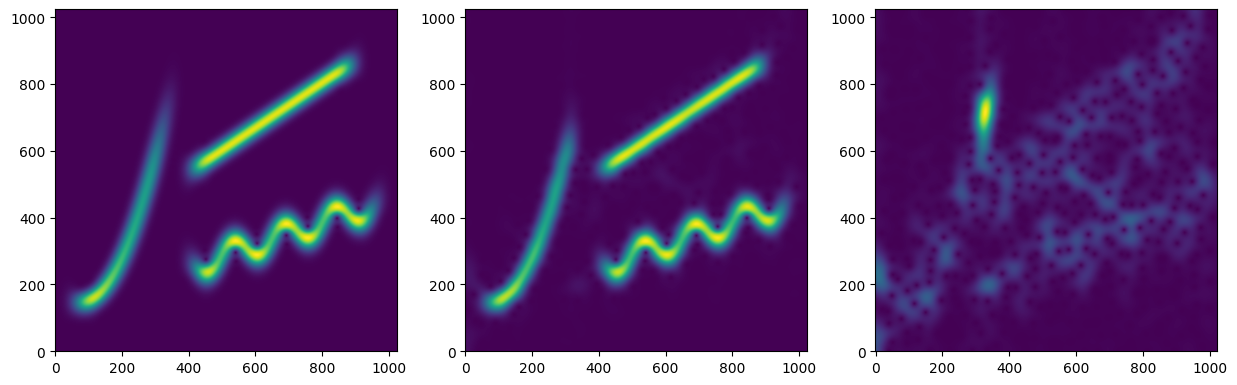

In [4]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
ax[2].imshow(abs(F_output-F), origin='lower')#, cmap=cmocean.cm.deep)
plt.show()


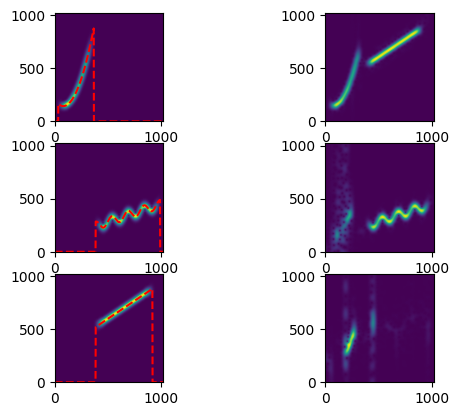

In [5]:
# signal_output = funa(signal,[],True,Pnei,M,L,return_comps)
signal_output = funa(signal,[],[],[],[],[],True)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]

    S_output, F_output = get_spectrogram(signal_output[i], window = g)
    F_output = F_output[0:N+1]

    
    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,0].plot(signal.instf[i]*Nfft,'--r')
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

plt.show()

c:\Users\juan_\Nextcloud\Miramont_Juan\python_code\benchmark-eusipco\.venv\lib\site-packages\numpy\core\fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[2, 1, 0]


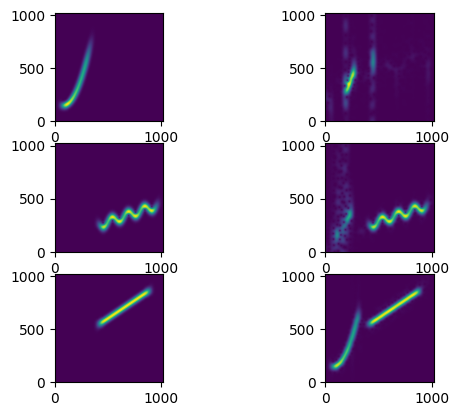

In [6]:
from benchmark_demo.perf_metrics import order_components, mse

order = order_components(signal_output,signal.comps)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[order[i]], window = g)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)


print(order)

3


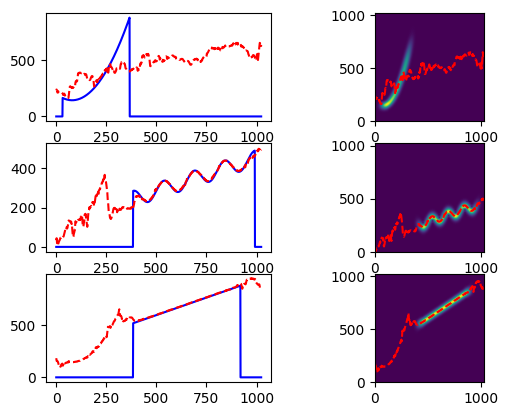

In [7]:
signal_output = funa(signal,[],[],[],[],[],[],True)

order = order_components(signal_output,signal.instf, minormax = 'min', metric = mse)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    # S_output, F_output = get_spectrogram(signal_output[order[i]], window = g)
    # F_output = F_output[0:N+1]

    axs[i,0].plot(signal.instf[i]*Nfft,'b')
    axs[i,0].plot(signal_output[order[i]]*Nfft,'r--')
    axs[i,1].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].plot(signal_output[order[i]]*Nfft,'r--')

print(len(signal.instf))